Importing the libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loadind the dataset


In [2]:
file_path = "power_consumption.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

Converting the data column to date and time format
To perform time series analysis the date should be along with time stamps

In [4]:
df['date'] = pd.to_datetime(df['date'])


Setting the data as index for timeseries

In [5]:
df.set_index('date', inplace=True)

visualizing the overall power consumption for better understanding

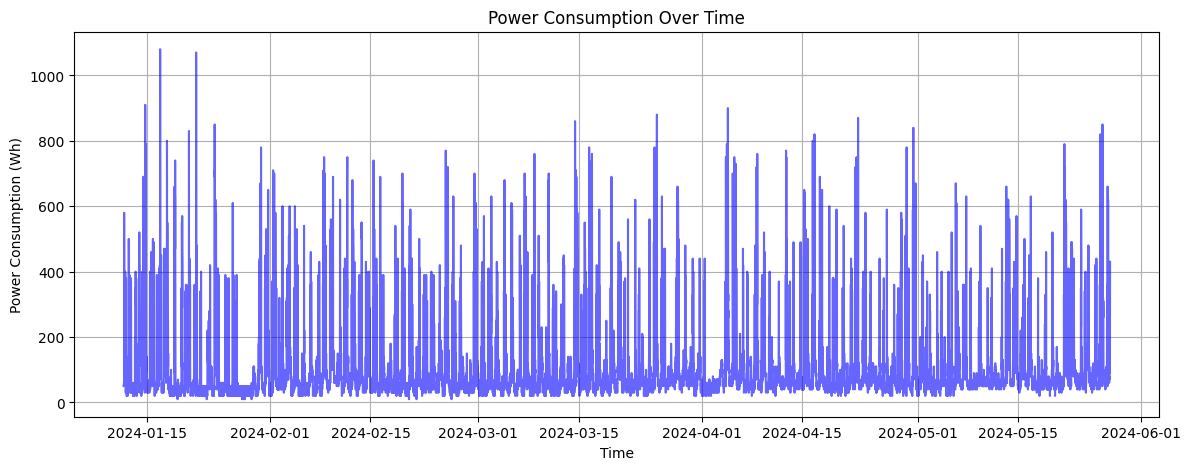

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(df['Appliances'], color='blue', alpha=0.6)
plt.title("Power Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Power Consumption (Wh)")
plt.grid(True)
plt.show()

From the graph we can observe that their is non linearity presents in the consumption of power which shows seasonality 

Lets brake down and see the consumpiton as daily,weekly,monthly bases

In [13]:
# Resampling data to observe daily, weekly, and monthly trends
df_daily = df['Appliances'].resample('D').sum()
df_weekly = df['Appliances'].resample('W').sum()
df_monthly = df['Appliances'].resample('ME').sum()

Visualizing the power consumption pattren as daily , weekly and monthly basis

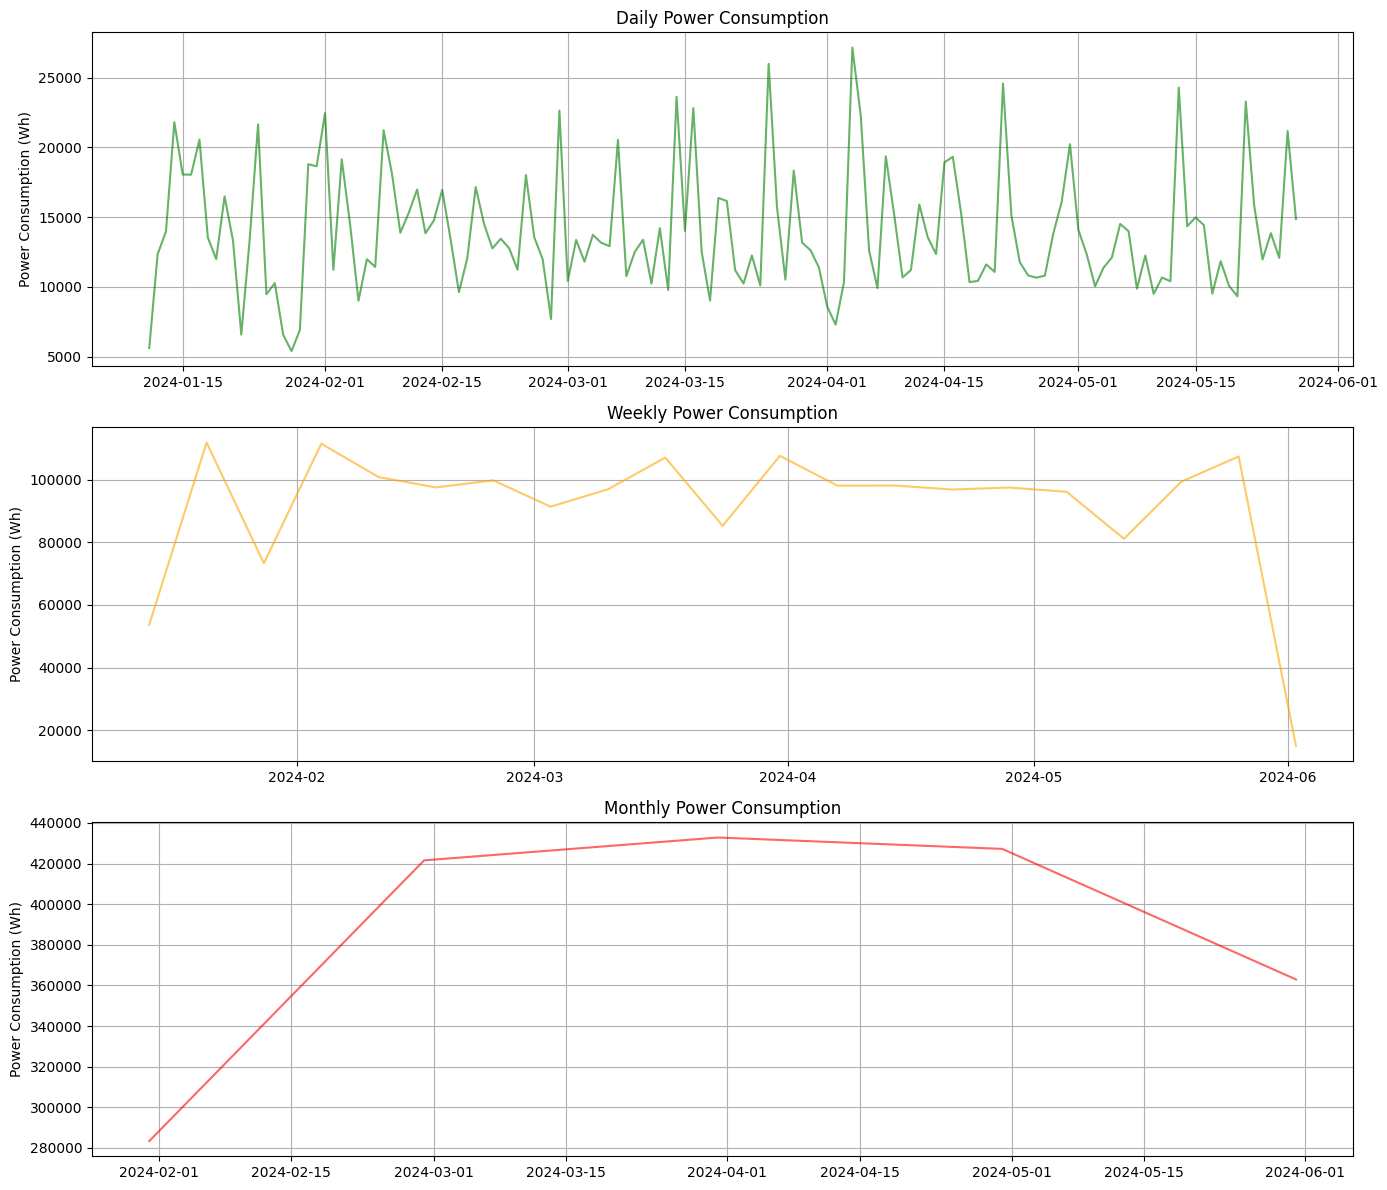

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12))

ax[0].plot(df_daily, color='green', alpha=0.6)
ax[0].set_title("Daily Power Consumption")
ax[0].set_ylabel("Power Consumption (Wh)")

ax[1].plot(df_weekly, color='orange', alpha=0.6)
ax[1].set_title("Weekly Power Consumption")
ax[1].set_ylabel("Power Consumption (Wh)")

ax[2].plot(df_monthly, color='red', alpha=0.6)
ax[2].set_title("Monthly Power Consumption")
ax[2].set_ylabel("Power Consumption (Wh)")

for a in ax:
    a.grid(True)

plt.tight_layout()
plt.show()

From the above plot we can observe that on daily basis: there are flactuations of power usage which indicates working and non working hours

Weekly:Weekly basis the flactuations are less which indicates the weekdays and weekend usage Where in weekends the power consumption grows high and in weekdays less usage

Montly basis: it shows long time seasonality where for a particular period the power consumption grows linearly and for a period of time it remains almost constant usage and for soe other period the power consumption gradually decreases which shows seasonality

Lets create correlation matrix

In [17]:
correlation_matrix = df.corr()

# Extract correlations with 'Appliances'
corr_with_appliances = correlation_matrix["Appliances"].sort_values(ascending=False)

Ploting the heat map and visualizing the correlation

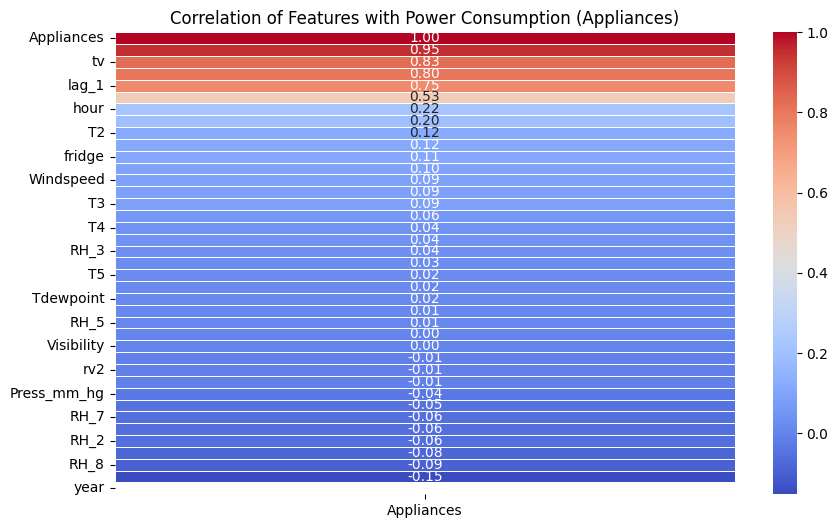

Appliances     1.000000
fans           0.950772
tv             0.826126
ac             0.803231
lag_1          0.753165
lag_2          0.534236
hour           0.216830
lights         0.197511
T2             0.120056
T6             0.117633
fridge         0.110959
T_out          0.099149
Windspeed      0.087171
RH_1           0.086110
T3             0.085021
T1             0.055410
T4             0.040249
T8             0.039507
RH_3           0.036360
T7             0.025750
T5             0.019713
RH_4           0.017026
Tdewpoint      0.015366
T9             0.009966
RH_5           0.006972
day            0.002344
Visibility     0.000302
rv1           -0.011168
rv2           -0.011168
month         -0.011666
Press_mm_hg   -0.035011
RH_9          -0.051429
RH_7          -0.055602
day_of_week   -0.058136
RH_2          -0.060429
RH_6          -0.083147
RH_8          -0.094003
RH_out        -0.152258
year                NaN
Name: Appliances, dtype: float64


In [18]:
# Plot correlation heatmap for top features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Appliances']].sort_values(by='Appliances', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Power Consumption (Appliances)")
plt.show()

# Display top correlated features
print(corr_with_appliances)